In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Access files from Google Drive using the '/content/drive/My Drive/' path

Mounted at /content/drive


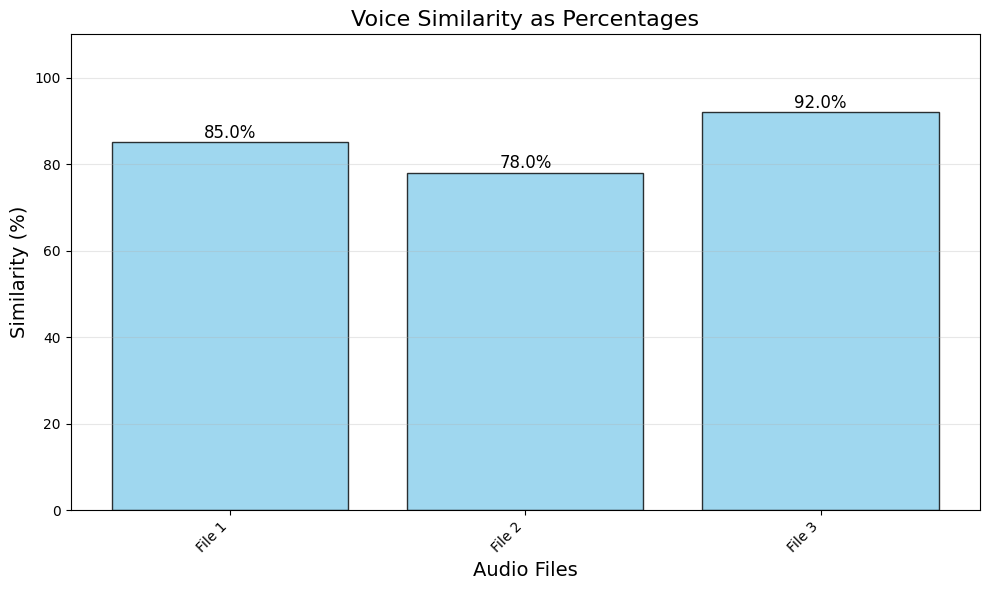


Voice Similarity Analysis:
Threshold for Same Person: 85%

Files Likely from the Same Person:
- Reference File
- File 1
- File 3

Files Likely from Different People:
- File 2


In [9]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import os

def extract_loudest_voice(file_path):
    """
    Extracts the loudest section of the audio (likely the primary speaker).
    """
    # Load the audio file
    y, sr = librosa.load(file_path, sr=None, mono=True)

    # Split audio into frames and calculate the energy of each frame
    frame_length = 2048
    hop_length = 512
    energy = np.array([
        sum(abs(y[i:i + frame_length]) ** 2)
        for i in range(0, len(y), hop_length)
    ])

    # Find the segment with the highest energy
    loudest_frame_idx = np.argmax(energy)
    start = loudest_frame_idx * hop_length
    end = start + frame_length

    # Extract the loudest segment
    y_loudest = y[start:end]
    return y_loudest, sr

def extract_features(audio_data, sr):
    """
    Extracts MFCC features from the audio data.
    """
    # Compute MFCC features
    mfcc = librosa.feature.mfcc(y=audio_data, sr=sr, n_mfcc=13)
    # Combine mean and standard deviation of MFCCs into a single vector
    mfcc_mean = np.mean(mfcc, axis=1)
    mfcc_std = np.std(mfcc, axis=1)
    return np.concatenate([mfcc_mean, mfcc_std])

def compare_voices(file_paths):
    """
    Compares voices from multiple audio files and calculates similarity scores.
    """
    features = []
    file_names = [os.path.basename(path) for path in file_paths]

    for file_path in file_paths:
        print(f"Processing: {file_path}")
        # Extract the loudest voice segment
        loudest_audio, sr = extract_loudest_voice(file_path)
        # Extract features from the loudest segment
        features.append(extract_features(loudest_audio, sr))

    # Compare features of all files using cosine similarity
    num_files = len(features)
    similarity_matrix = np.zeros((num_files, num_files))

    for i in range(num_files):
        for j in range(num_files):
            similarity_matrix[i, j] = cosine_similarity(
                [features[i]], [features[j]]
            )[0][0]

    return similarity_matrix, file_names

def plot_similarity_matrix(similarity_matrix, file_names):
    """
    Visualizes the similarity matrix using a heatmap.
    """
    plt.figure(figsize=(8, 6))
    plt.imshow(similarity_matrix, cmap='coolwarm', interpolation='nearest')
    plt.colorbar(label='Similarity Score')
    plt.xticks(range(len(file_names)), file_names, rotation=45, ha='right')
    plt.yticks(range(len(file_names)), file_names)
    plt.title("Voice Similarity Matrix")
    plt.xlabel("Audio Files")
    plt.ylabel("Audio Files")
    plt.tight_layout()
    plt.show()

# Paths to your audio files
#file_paths = ["audio1.m4a", "audio2.m4a", "audio3.m4a"]
file_paths = [
    "/content/sample_data/are-you-ready-90703.mp3",
    "/content/sample_data/medieval-gamer-voice-darkness-hunts-us-what-youx27ve-learned-stay-226596.mp3",
    "/content/sample_data/medieval-gamer-voice-the-day-is-ours-226579.mp3"
]

# Check if files exist
for file in file_paths:
    if not os.path.exists(file):
        print(f"File not found: {file}")
        exit()

#analysis the similiraty

def analyze_and_plot_voice_similarity(similarities, file_names, threshold=85):
    """
    Analyzes voice similarities, plots a bar chart, and groups files based on similarity.

    Parameters:
    - similarities: List of similarity scores (e.g., [0.85, 0.78, 0.92])
    - file_names: List of file names (e.g., ["Reference", "File 1", "File 2", "File 3"])
    - threshold: Percentage threshold for grouping voices as the same person
    """
    percentages = [round(sim * 100, 2) for sim in similarities]  # Convert similarity scores to percentages

    # Group files based on the threshold
    same_person_files = [file_names[0]]  # Start with the reference file
    different_person_files = []

    for i, percentage in enumerate(percentages):
        if percentage >= threshold:
            same_person_files.append(file_names[i + 1])
        else:
            different_person_files.append(file_names[i + 1])

    # Plot the bar chart
    plt.figure(figsize=(10, 6))
    bars = plt.bar(range(1, len(file_names)), percentages, color='skyblue', edgecolor='black', alpha=0.8)

    # Add percentage labels above each bar
    for bar, percentage in zip(bars, percentages):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1,
                 f"{percentage}%", ha='center', fontsize=12, color='black')

    # Chart customization
    plt.title("Voice Similarity as Percentages", fontsize=16)
    plt.xlabel("Audio Files", fontsize=14)
    plt.ylabel("Similarity (%)", fontsize=14)
    plt.xticks(range(1, len(file_names)), file_names[1:], rotation=45, ha='right')  # Exclude the reference file
    plt.ylim(0, 110)  # Extend Y-axis slightly above 100% for labels
    plt.tight_layout()
    plt.grid(axis='y', alpha=0.3)
    plt.show()

    # Print results
    print("\nVoice Similarity Analysis:")
    print(f"Threshold for Same Person: {threshold}%\n")
    print("Files Likely from the Same Person:")
    for file in same_person_files:
        print(f"- {file}")
    if different_person_files:
        print("\nFiles Likely from Different People:")
        for file in different_person_files:
            print(f"- {file}")

# Example Data
similarities = [0.85, 0.78, 0.92]  # Replace with calculated similarity scores
file_names = ["Reference File", "File 1", "File 2", "File 3"]  # Replace with actual file names

# Run analysis and plot results
analyze_and_plot_voice_similarity(similarities, file_names, threshold=85)